### Used method found in the following link:
https://towardsdatascience.com/how-to-use-machine-learning-for-anomaly-detection-and-condition-monitoring-6742f82900d7

In [2]:
import pandas as pd
import numpy as np
import os
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
from tensorflow import set_random_seed

from keras.layers import Input, Dropout
from keras.layers.core import Dense
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json

Using TensorFlow backend.


In [3]:
file = 'source_data/lindatatussin_scrubbed.csv'

In [4]:
df = pd.read_csv(file, encoding="ISO-8859-1")

In [5]:
df.head()

,Sample-Number,Measure F,Measure E,Measure D,Measure C,Measure G,Measure B,Measure A,Measure H
0,32976,0.3,0.7,9.8,283,0.020,99.6,6.0,140
1,33045,0.3,0.7,9.9,282,0.020,99.4,6.1,158
2,33232,0.4,1.1,11.0,282,0.028,100.0,6.1,149
3,33244,0.1,1.1,10.6,284,0.020,99.9,6.0,157
4,33392,0.1,1.3,11.7,289,0.021,99.1,6.1,159


In [6]:
df.describe()

,Sample-Number,Measure F,Measure E,Measure D,Measure C,Measure G,Measure B,Measure A,Measure H
count,2.200000e+02,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,7.877539e+05,0.207273,0.914091,12.291364,278.427273,0.020295,99.738182,6.028636,149.445455
std,6.130587e+05,0.094322,0.244635,1.385366,19.706040,0.003419,0.250655,0.054463,5.967318
min,3.297600e+04,0.100000,0.400000,8.800000,133.000000,0.003000,98.800000,5.800000,140.000000
25%,2.064330e+05,0.100000,0.775000,11.100000,279.000000,0.019000,99.600000,6.000000,144.000000
50%,7.255275e+05,0.200000,0.900000,12.400000,281.000000,0.020000,99.800000,6.000000,149.000000
75%,1.333909e+06,0.300000,1.000000,13.300000,283.000000,0.021000,99.900000,6.100000,155.000000
max,1.895228e+06,0.500000,1.800000,15.600000,300.000000,0.044000,100.000000,6.200000,159.000000


In [7]:
df_an = df.drop('Sample-Number', axis=1)

In [8]:
dataset_train = df_an[:96]
dataset_test = df_an[96:]


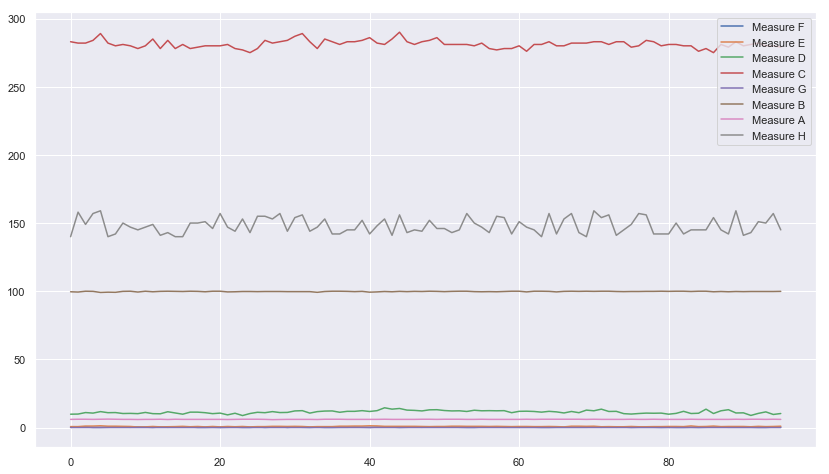

In [9]:
dataset_train.plot(figsize = (14,8))
plt.savefig('images/all_measure_traces.png')

In [10]:
scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(dataset_train),
                      columns=dataset_train.columns,
                      index=dataset_train.index)

X_test = pd.DataFrame(scaler.transform(dataset_test),
                     columns=dataset_test.columns,
                     index=dataset_test.index)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Using autoencoder

In [11]:
seed(10)
set_random_seed(10)
act_func = 'elu'

In [12]:
# Input layer:
model=Sequential()
#First hidden layer, connected to input vector X
model.add(Dense(10, activation=act_func,
               kernel_initializer='glorot_uniform',
               kernel_regularizer=regularizers.l2(0.0),
               input_shape=(X_train.shape[1],)
               )
         )

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
model.add(Dense(2,activation=act_func,
               kernel_initializer='glorot_uniform'))

In [14]:
model.add(Dense(10,activation=act_func,
               kernel_initializer='glorot_uniform'))

In [15]:
model.add(Dense(X_train.shape[1],
               kernel_initializer='glorot_uniform'))

In [16]:

model.compile(loss='mse', optimizer='adam')

# Train the model
NUM_EPOCHS = 100
BATCH_SIZE = 10

In [17]:
history=model.fit(np.array(X_train), np.array(X_train),
                 batch_size=BATCH_SIZE,
                 epochs=NUM_EPOCHS,
                 validation_split=0.05,
                 verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 91 samples, validate on 5 samples
Epoch 1/100
91/91 [==============================] - 0s 3ms/step - loss: 0.4351 - val_loss: 0.3516
Epoch 2/100
91/91 [==============================] - 0s 275us/step - loss: 0.3617 - val_loss: 0.2969
Epoch 3/100
91/91 [==============================] - 0s 231us/step - loss: 0.3018 - val_loss: 0.2509
Epoch 4/100
91/91 [==============================] - 0s 176us/step - loss: 0.2526 - val_loss: 0.2152
Epoch 5/100
91/91 [==============================] - 0s 253us/step - loss: 0.2134 - val_loss: 0.1851
Epoch 6/100
91/91 [==============================] - 0s 176us/step - loss: 0.1819 - val_loss: 0.1597
Epoch 7/100
91/91 [==============================] - 0s 198us/step - loss: 0.1554 - val_loss: 0.1352
Epoch 8/100
91/91 [==============================] - 0s 198us/step - loss: 0.1338 - val_loss: 0.1164
Epoch 9/100
91/91 [==============================] - 0s 209us/step - loss: 0.1146 - val_loss: 0.1014
Ep

91/91 [==============================] - 0s 132us/step - loss: 0.0325 - val_loss: 0.0302
Epoch 79/100
91/91 [==============================] - 0s 143us/step - loss: 0.0325 - val_loss: 0.0297
Epoch 80/100
91/91 [==============================] - 0s 154us/step - loss: 0.0323 - val_loss: 0.0293
Epoch 81/100
91/91 [==============================] - 0s 132us/step - loss: 0.0322 - val_loss: 0.0289
Epoch 82/100
91/91 [==============================] - 0s 143us/step - loss: 0.0323 - val_loss: 0.0286
Epoch 83/100
91/91 [==============================] - 0s 154us/step - loss: 0.0320 - val_loss: 0.0285
Epoch 84/100
91/91 [==============================] - 0s 132us/step - loss: 0.0319 - val_loss: 0.0285
Epoch 85/100
91/91 [==============================] - 0s 121us/step - loss: 0.0318 - val_loss: 0.0286
Epoch 86/100
91/91 [==============================] - 0s 132us/step - loss: 0.0318 - val_loss: 0.0285
Epoch 87/100
91/91 [==============================] - 0s 132us/step - loss: 0.0317 - val_loss: 

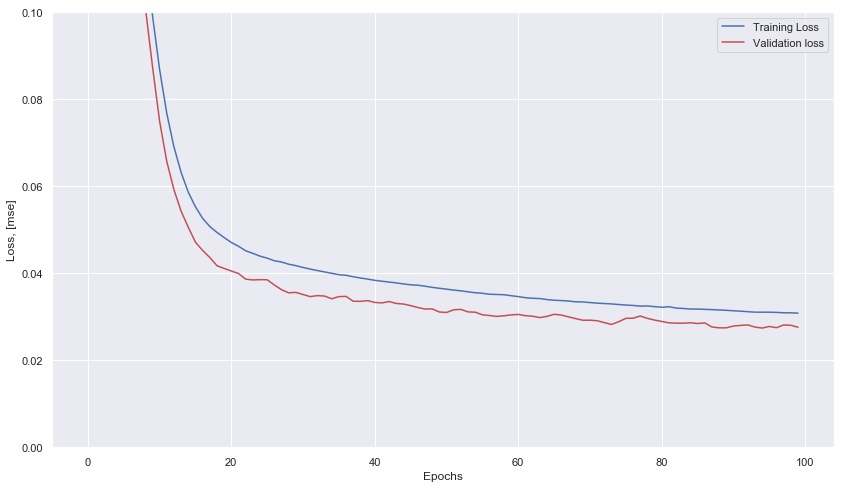

In [18]:
mpl.rcParams['figure.figsize'] = [14,8]
plt.plot(history.history['loss'],
        'b',
        label='Training Loss')
plt.plot(history.history['val_loss'],
        'r',
        label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.ylim([0,.1])
plt.plot(figsize = (14,8))
plt.savefig('images/training_val_loss.png')
plt.show()

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


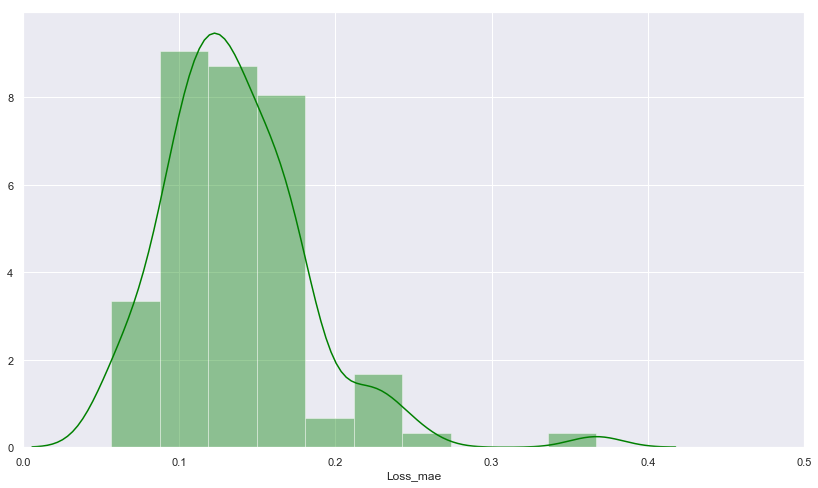

In [19]:
X_pred = model.predict(np.array(X_train))
X_pred = pd.DataFrame(X_pred, columns=X_train.columns)

X_pred.index = X_train.index

scored = pd.DataFrame(index=X_train.index)

scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure()
sns.distplot(scored['Loss_mae'],
             bins = 10, 
             kde= True,
            color = 'green');
plt.xlim([0.0,.5])
plt.savefig('images/loss_distribution.png')

Will use a threshold of 0.35

In [20]:
X_pred = model.predict(np.array(X_test))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_test.columns)
X_pred.index = X_test.index

scored = pd.DataFrame(index=X_test.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
scored['Threshold'] = 0.35
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

,Loss_mae,Threshold,Anomaly
96,0.294622,0.35,False
97,2.554626,0.35,True
98,0.133509,0.35,False
99,0.103371,0.35,False
100,0.180877,0.35,False


In [21]:
X_pred_train = model.predict(np.array(X_train))
X_pred_train = pd.DataFrame(X_pred_train, 
                      columns=X_train.columns)
X_pred_train.index = X_train.index

scored_train = pd.DataFrame(index=X_train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis = 1)
scored_train['Threshold'] = 0.35
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']

In [22]:
scored = pd.concat([scored_train, scored])
scored.head()

,Loss_mae,Threshold,Anomaly
0,0.083795,0.35,False
1,0.202747,0.35,False
2,0.238066,0.35,False
3,0.174032,0.35,False
4,0.367001,0.35,True


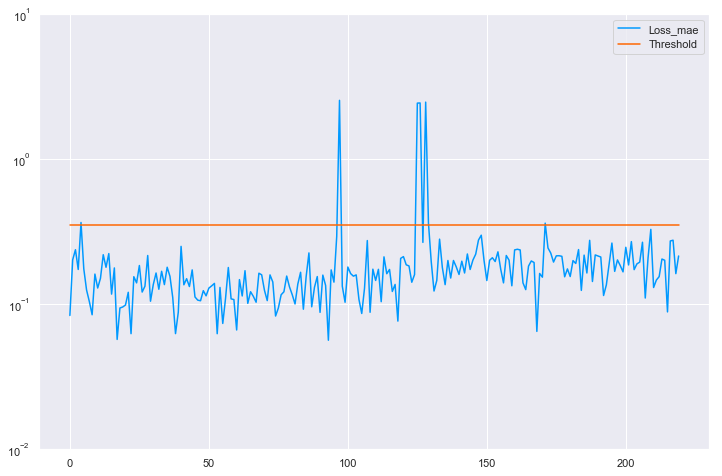

In [24]:
scored.plot(logy=True,  figsize = (12,8), ylim = [1e-2,1e1], color = ['#0099ff','#ff6600'])
plt.savefig('images/loss_threshold_all.png')